# TITLE OF THE PROJECT:

**Big Sales Prediction using Random Forest Regressor**

# OBJECTIVE:

 The primary objective of using the Random Forest Regressor algorithm for big sales prediction is to accurately forecast future sales based on historical sales data and other relevant features.

 By leveraging the ensemble learning capabilities of Random Forest, we aim to improve prediction accuracy, identify key factors influencing sales, and make data-driven decisions to optimize sales strategies and inventory management.

# DATA SOURCE:

https://www.kaggle.com/datasets

# IMPORT LIBRARY:

In [157]:
import pandas as pd
import numpy as np

# IMPORT DATA:

In [158]:
df=pd.read_csv('/content/Big Sales Data.csv')

# DESCRIBE DATA:

In [159]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [161]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [162]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


# DATA VISUALIZATION:

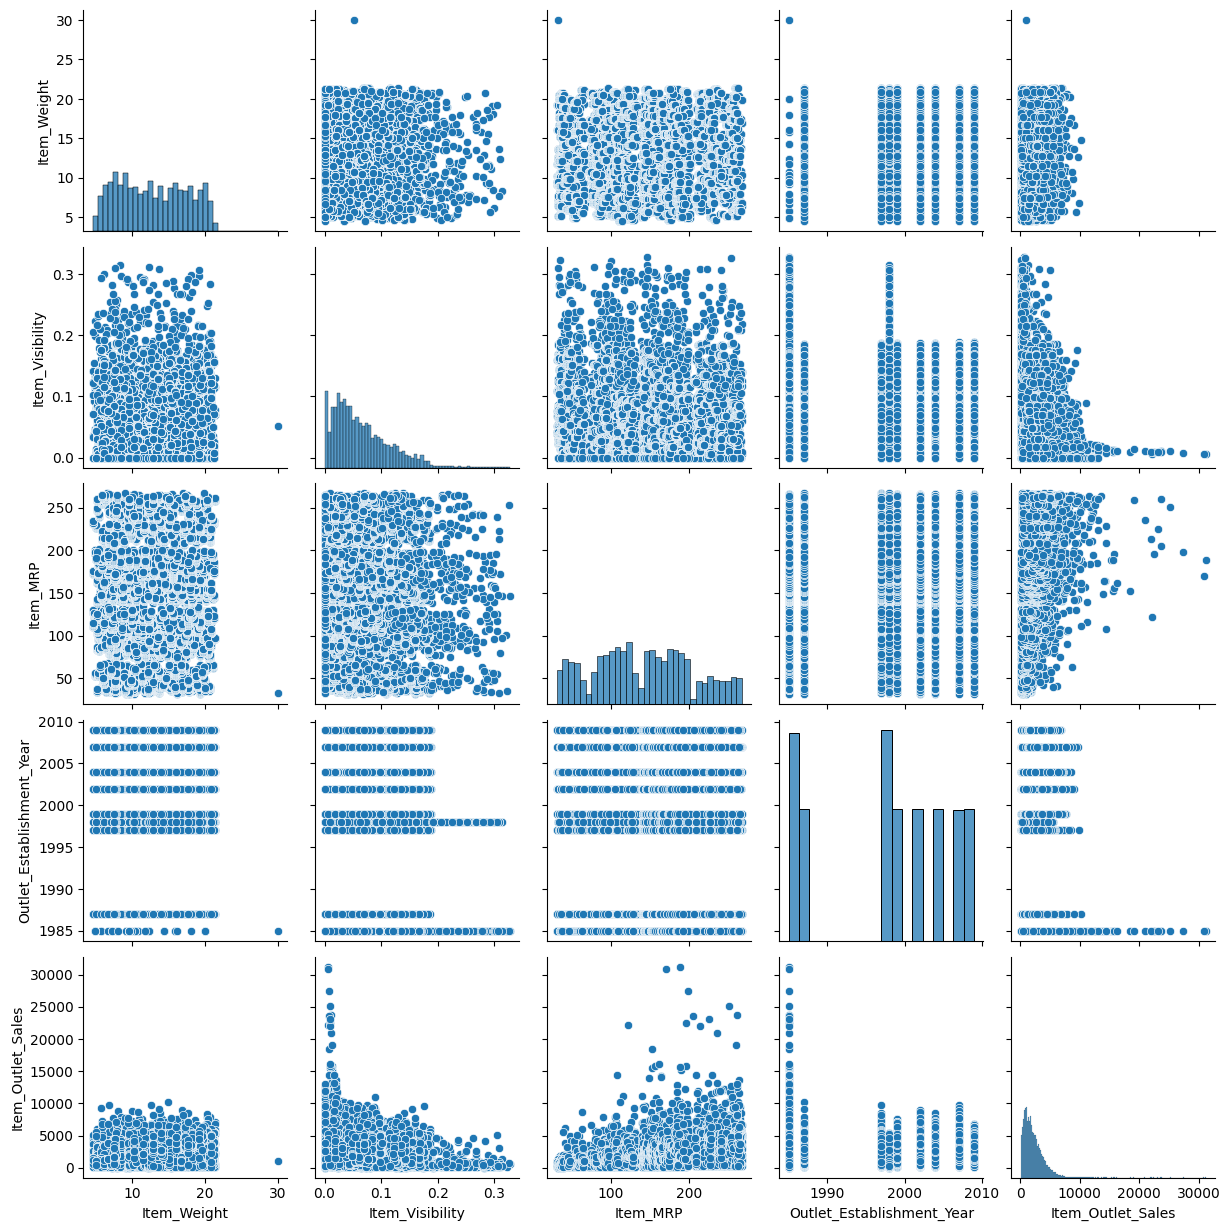

In [163]:
import seaborn as sns
sns.pairplot(df)

# DATA PREPROCESSING

In [164]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [166]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


Get categories & Count of categorical variables:

In [167]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Name: count, Length: 1559, dtype: int64

In [168]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
Name: count, dtype: int64

In [169]:
df.replace(
    {"Item_Fat_Content": {"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"}},
    inplace=True,
)

In [170]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
Name: count, dtype: int64

In [171]:
df.replace({'Item_Fat_Content': {'Low Fat':0,'Regular':1}}, inplace=True)

In [172]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [173]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,'Diary':0,'Baking Goods':0,'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}}, inplace = True)

In [174]:
df[['Item_Type']].value_counts()

Item_Type
0            10382
1             2406
Dairy         1136
2              280
Name: count, dtype: int64

In [175]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
Name: count, dtype: int64

In [176]:
df.replace(
    {
        'Outlet_Identifier': {
            "OUT027": 0,
            "OUT013": 1,
            "OUT035": 2,
            "OUT046": 3,
            "OUT049": 4,
            "OUT045": 5,
            "OUT018": 6,
            "OUT017": 7,
            "OUT010": 8,
            "OUT019": 9,
        }
    },
    inplace=True,
)

In [177]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
Name: count, dtype: int64

In [178]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
Name: count, dtype: int64

In [179]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}}, inplace = True)

In [180]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
Name: count, dtype: int64

In [181]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
Name: count, dtype: int64

In [182]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2': 1,'Tier 3':2}}, inplace= True)

In [183]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
Name: count, dtype: int64

In [184]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

In [185]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}}, inplace= True)

In [186]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
Name: count, dtype: int64

In [187]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.3+ MB


In [189]:
df.shape

(14204, 12)

In [190]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Define Target Variable (y) and Feature Variables (X)

In [191]:
y=df['Item_Outlet_Sales']

In [192]:
y.shape

(14204,)

In [193]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [194]:
X=df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

Drop Function to define X

In [195]:
X=df.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)

In [196]:
X.shape

(14204, 10)

In [197]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
sc= StandardScaler()

In [200]:
X_Std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [201]:
X_Std=sc.fit_transform(X_Std)

In [202]:
X_Std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [203]:
X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = pd.DataFrame(X_Std, columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'])

In [204]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,4,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,2,0.736955,0,1,1
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,1,2,3


# TRAIN TEST SPLIT

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=2529)

In [207]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

# MODELING

In [208]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rfr=RandomForestRegressor(random_state=2529)

In [210]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Assuming 'y_train' is a Pandas Series, check for non-numeric values
if y_train.dtype == 'object':
    print("Warning: y_train contains non-numeric values. Check if it's the correct target variable.")
    # Optionally, print unique values to identify the issue:
    print(y_train.unique())

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Store encoded values separately

# Identify categorical features in X_train
categorical_features = X_train.select_dtypes(include=['object', 'int']).columns

# Convert all values in categorical features to strings
X_train[categorical_features] = X_train[categorical_features].astype(str)

# Apply OneHotEncoder to categorical features
ohe = OneHotEncoder()
X_train_encoded = ohe.fit_transform(X_train[categorical_features])

# Convert the encoded features to a DataFrame and concatenate with the rest of X_train
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=ohe.get_feature_names_out(categorical_features))
X_train_final = pd.concat([X_train.drop(columns=categorical_features).reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

# Fit the RandomForestRegressor
rfr = RandomForestRegressor(random_state=2529)
rfr.fit(X_train_final, y_train_encoded)


RandomForestRegressor(random_state=2529)

# MODEL PREDICTION:

In [211]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# ... (previous code remains the same)

# Transform the test data (X_test) in the same way as the training data
X_test[categorical_features] = X_test[categorical_features].astype(str)  # Convert to strings
X_test_encoded = ohe.transform(X_test[categorical_features])  # Use the same OneHotEncoder object
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=ohe.get_feature_names_out(categorical_features))
X_test_final = pd.concat([X_test.drop(columns=categorical_features).reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Now predict using the transformed test data
y_pred = rfr.predict(X_test_final)

In [212]:
y_pred.shape

(1421,)

In [213]:
y_pred

array([3270.43, 1349.66, 4090.2 , ..., 4682.5 , 5998.2 , 1106.99])

# MODEL EVALUATION:

In [214]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [215]:
mean_squared_error(y_test, y_pred)

5850765.868069927

In [216]:
mean_absolute_error(y_test, y_pred)

1979.1454637817735

In [217]:
r2_score(y_test, y_pred)

-0.5228674876839503

# PREDICTION VISUALIZATION :

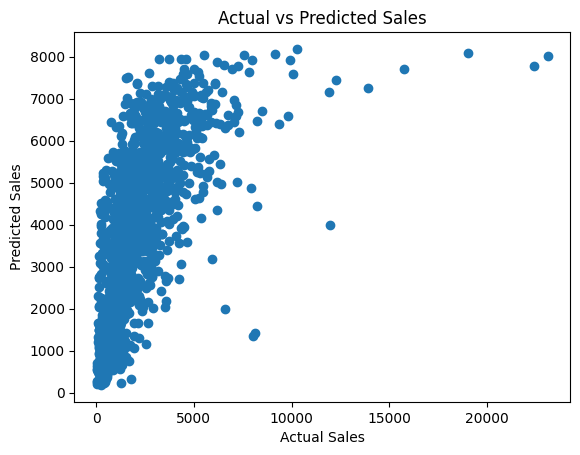

In [218]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# EXPLANATION:

Trained Model: Imagine you have a trained Random Forest Regressor model. This model is built from many decision trees, each of which has learned patterns from your historical sales data.

New Data Input: You input the data for a new sales period into the model. This data might include features like advertising spend, seasonal factors, product prices, and so on.

Individual Tree Predictions: Each decision tree in the forest makes its own prediction for the sales based on the new data. These trees have learned different aspects of the data, so their predictions might slightly differ.

Aggregation: The Random Forest Regressor takes the average (mean) of all these individual tree predictions to make the final prediction. By averaging, it reduces the risk of overfitting to any single tree's potential errors and provides a more robust estimate.

Final Prediction: The result is a single sales prediction value, which is the model's best estimate of what the sales will be, based on the input features.